In [1]:
import subprocess
import pathlib
import os
import sys
import platform
from importlib import reload 
import logging

logger = logging.getLogger(__name__)
logger.setLevel( logging.DEBUG )

try:
    GIT_CMD
except NameError:
    GIT_CMD = 'git'

try:
    cfg
except NameError:
    cfg = {}
    
class cd:
    """Context manager for changing the current working directory"""
    def __init__(self, newPath):
        self.newPath = pathlib.Path(newPath).expanduser().resolve()

    def __enter__(self):
        self.savedPath = pathlib.Path.cwd()
        os.chdir(self.newPath)

    def __exit__(self, etype, value, traceback):
        os.chdir(self.savedPath)

def updateGit( url, dirname, branch,  root ):
        with cd( root ):
            p = pathlib.Path( dirname )
            if ( branch ):
                bs = " --branch " + branch
            else:
                bs = ""
            if not p.is_dir():
                print("cloning {0} from url {1} root {2}".format( dirname, url, root ), 'git command', GIT_CMD)
                    
                cmd = GIT_CMD + " clone " + bs + " " + url + " " + dirname 
                os.system( cmd )
            else:
                logger.info("git directory exists")

            with cd( dirname ):
                logger.info("Executing git pull")
                o = None
                try:
                    o = subprocess.check_output(GIT_CMD + " pull", stderr=subprocess.STDOUT, shell=True)
                except subprocess.CalledProcessError:
                    pass
                if ( o ):
                    logger.info( 'git pull:' + o.decode('utf-8') )

updateGit('https://github.com/cvroberto21/NTNU-Lectures.git', 'NTNU-Lectures', 'mg', '.')

d = str( pathlib.Path( pathlib.Path('.') / 'NTNU-Lectures' ).resolve() )
if d not in sys.path:    
    sys.path.append(  d )
logger.debug('System Path %s', sys.path)

import jblecture

jblecture = reload(jblecture)
node = platform.node()

# %reload_ext jblecture
jblecture.load_ipython_extension( get_ipython(), cfg )

from jblecture import addJBImage, addJBVideo, addJBData, addJBFigure, addJBGraph, addJBAnimation
from jblecture import addJBCharacter
from jblecture import createTable
from jblecture import instTemplate
from jblecture import _a
from jblecture import downloadDir, zipDirectory
from IPython.core.display import display, HTML, Math

doc = cfg['doc']
GDrive = None

import IPython
import uuid

def createRevealJSAndDownload():
    logger.info('Create reveal.js and download it')
    doc.createRevealDownload( cfg['REVEAL_DIR'] )
    downloadDir( cfg['ROOT_DIR'] / "{title}_reveal.zip".format( title=title ), "reveal.js", cfg['ROOT_DIR'] )

def finalize():
    cfg['TITLE'] = title
    
    doc.createRevealDownload( cfg['REVEAL_DIR'] )
    
    if jblecture.jbgithub.createGitHub( cfg['TITLE'], cfg['ROOT_DIR']):
        logger.debug("Successful upload of presentation")
        print("You can access the presentation at " + cfg['GITHUB_PAGES_URL'] )
    else:
        logger.warning("Upload of presentation failed")

# logging.getLogger().setLevel(logging.WARNING)

# jblecture.jbgithub.login( jblecture.jbgithub.readGithubToken() )
# if ( cfg['GITHUB'] ):
#     logging.info("Successful login to github")
# else:
#     logging.warning("Github integration disabled")

# This must come last

# class InvokeButton(object):

#     def __init__(self, title, callback):
#         self._title = titlea
#         self._callback = callback

#     def _repr_html_(self):
#         from google.colab import output
#         callback_id = 'button-' + str(uuid.uuid4())
#         output.register_callback(callback_id, self._callback)

#         template = """<button id="{callback_id}" style="height:3cm;">{title}</button>
#             <script>
#             document.querySelector("#{callback_id}").onclick = (e) => {{
#                 //IPython.notebook.execute_cells_after()
#                 google.colab.kernel.invokeFunction('{callback_id}', [], {{}})
#                 e.preventDefault();
#             }};
#             </script>"""
#         html = template.format(title=self._title, callback_id=callback_id)
#         return html

# InvokeButton('Create and Download Reveal.js Slideshow', createRevealJSAndDownload )



cloning NTNU-Lectures from url https://github.com/cvroberto21/NTNU-Lectures.git root . git command git


In [2]:
%%writefile jb_geometry.py
import math
import numpy as np 

def rotateZ( theta ):
    rz = np.array( [ [ math.cos( theta ), - math.sin( theta ), 0, 0 ],
                           [ math.sin( theta ), math.cos( theta ), 0, 0 ],
                           [ 0, 0, 1, 0 ],
                           [ 0, 0, 0, 1 ] ] )
    return rz

def rotateY( theta ):
    ry = np.array( [ [ math.cos( theta ), 0, math.sin( theta ), 0 ],
                           [ 0, 1, 0, 0 ],
                           [ - math.sin( theta ), 0, math.cos( theta ), 0 ],
                           [ 0, 0, 0, 1 ] ] )
    return ry

def rotateX( theta ):
    rx = np.array( [ [ 1, 0, 0, 0 ],
                           [ 0, math.cos( theta ), - math.sin( theta ), 0 ],
                           [ 0, math.sin( theta ), math.cos( theta ), 0 ],
                           [ 0, 0, 0, 1 ] ] )
    return rx

def translate( dx, dy, dz ):
    t = np.array( [ [ 1, 0, 0, dx ],
                          [ 0, 1, 0, dy ],
                          [ 0, 0, 1, dz ],
                          [ 0, 0, 0, 1 ] ] )
    return t

def DHH( theta, d, a, alpha ):
    return rotateZ( theta ).dot( translate( 0, 0, d) ).dot( translate( a, 0, 0 ) ).dot( rotateX( alpha ) )

def plotCoordinateSystem( ax, length = 1.0, width = 1.0, A = None ):
    if ( A is None ):
        A = np.eye( 4 )
    xAxis = np.array( [ [ 0, 0, 0, 1], [ length, 0, 0, 1 ] ] ).T
    yAxis = np.array( [ [ 0, 0, 0, 1], [ 0, length, 0, 1 ] ] ).T
    zAxis = np.array( [ [ 0, 0, 0, 1], [ 0, 0, length, 1 ] ] ).T
    
    ax.plot( A.dot( xAxis )[0,:], A.dot( xAxis )[1,:], A.dot( xAxis )[2,:], 'r-', linewidth=width )
    ax.plot( A.dot( yAxis )[0,:], A.dot( yAxis )[1,:], A.dot( yAxis )[2,:], 'g-', linewidth=width )
    ax.plot( A.dot( zAxis )[0,:], A.dot( zAxis )[1,:], A.dot( zAxis )[2,:], 'b-', linewidth=width )

def drawLink(ax, A1, A2, width=1 ):
    x1 = A1.dot( np.array( [ 0, 0, 0, 1 ] ).T )
    x2 = A2.dot( np.array( [ 0, 0, 0, 1 ] ).T )
    c = np.vstack( (x1, x2 ) ).T
    print('x1', x1, 'x2', x2, 'c', c)
    ax.plot( c[0,:], c[1,:], c[2,:], color='#50303030', linewidth=width )

Writing jb_geometry.py


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import jb_geometry as jbg

In [4]:

LEFT_ANKLE, RIGHT_ANKLE, LEFT_CALF, RIGHT_CALF, LEFT_THIGH, RIGHT_THIGH, TORSO, LEFT_LARM, RIGHT_LARM, LEFT_UARM, RIGHT_RARM, HEAD = range( 12 )

robotLinks = [ 0.1, 0.1, 0.12, 0.12, 0.092, 0.092, 0.08, 0.13, 0.13, 0.085, 0.085, 0.06 ]   # length of link in m (foot, calf, thigh, torso, lower arm, upper arm, head )
robotMasses = [ 0.3, 0.3, 0.5, 0.5, 0.6, 0.6, 1.0, 0.7, 0.7, 0.6, 0.6, 0.3 ]
robotQ = [ 0.0/180.0 * math.pi, 0.0/180.0 * math.pi, 0.0/180.0 * math.pi, 0.0/180.0 * math.pi, 
          0.0/180.0 * math.pi, 0.0/180.0 * math.pi, 0.0/180.0 * math.pi, 0.0/180.0 * math.pi, 0.0/180.0 * math.pi ]

In [5]:
LEFT_SUPPORT_OFFSET, RIGHT_SUPPORT_OFFSET = range(2)
LEFT_LEG_SUPPORT, RIGHT_LEG_SUPPORT = LEFT_SUPPORT_OFFSET, RIGHT_SUPPORT_OFFSET

legColors = [ "#ff8080", "#8080ff" ]
armColors = [ "pink", "red" ]

ORIGIN = [0, 0, 0, 1]

def drawRobot( ax, support, q, rPos, links ):
  # Draw support leg Ankle, Calf, Thigh
  theta = 0.0/180.0
  prev = np.eye(4).dot( jbg.translate( rPos[0], rPos[1], 0) )

  T = []
  artists = []
  pos = []
  #print(rPos)
  #print(q)
  #print("Draw ankle", rPos[0] - links[LEFT_ANKLE]/2, rPos[0] + links[LEFT_ANKLE]/2)

  artists.append( ax.plot( [ prev.dot( jbg.translate( -links[LEFT_ANKLE+support]/2, 0, 0 )  )[0], 
                              prev.dot( jbg.translate( links[LEFT_ANKLE+support]/2, 0, 0) ) [0] ], 
                           [ prev.dot(jbg.translate( -links[LEFT_ANKLE+support]/2, 0, 0 )  )[1], 
                              prev.dot( jbg.translate( links[LEFT_ANKLE+support]/2, 0, 0) ) [1] ], 
                          '-', color=legColors[support], linewidth=5 )[0] )
  xp,yp,_,_ = prev.dot( ORIGIN )
  pos.append([xp,yp])

  #artists.append( ax.plot( [0,0], [1,1], 'g-')[0] )
# leg 1
  for i in range( LEFT_ANKLE+support, LEFT_ANKLE+4+support, 2 ):
    #print("Plotting support leg", i)
    angle = q[i]
    xp,yp,_,_ = prev.dot( ORIGIN )

    A = prev.dot( jbg.rotateZ( angle ) ).dot( jbg.translate( links[i+2], 0, 0 ) )
    T.append(A)
    xn,yn,_,_ = A.dot( ORIGIN )
    pos.append([xn,yn])
    #print( f"[{xp},{yp}]->[{xn},{yn}]")
    artists.append( ax.plot( [xp, xn], [yp, yn], linestyle="-", color=legColors[support], linewidth=7 )[0] )
    prev = A    
  



  # torso
  hip = A
  xt, yt, _, _ = hip.dot( ORIGIN )
  angle = q[LEFT_THIGH + support ]
  AHead = hip.dot( jbg.rotateZ( angle) ).dot( jbg.translate( links[TORSO], 0, 0 ) )
  prev = AHead.dot( jbg.translate( -links[TORSO], 0, 0 ) )
  prev2 = AHead.dot( jbg.translate( links[TORSO]/4, 0, 0 ) )
  prev3 = AHead.dot( jbg.translate( -links[TORSO]/8, 0, 0 ) )
  prev4 = AHead.dot( jbg.translate( -links[TORSO]/8, 0, 0 ) )

  xh,yh,_,_ = AHead.dot( ORIGIN )
  pos.append([xh,yh])
 
 #arm 1
  for i in range( LEFT_LARM+1, LEFT_LARM, -2 ):
    #print("Plotting support leg", i)
    #print('q', i, q[i]/math.pi * 180.0)
    angle = 0.1
    #angle = angle - q[(i//2)-1]
    #print('angle', angle/math.pi * 180.0)

    xp,yp,_,_ = prev3.dot( ORIGIN )

    A = prev3.dot( jbg.rotateZ( 0.1 )).dot( jbg.translate( -links[i], 0, 0 ) )

    #A = prev3.dot( jbg.rotateZ( -q[(i//2)-1] ) ).dot( jbg.translate( -links[i], 0, 0 ) )
    T.append(A)
    xn,yn,_,_ = A.dot( ORIGIN )
    pos.append([xn,yn])
    #print( f"[{xp},{yp}]->[{xn},{yn}]")
    artists.append( ax.plot( [xp, xn], [yp, yn], linestyle="-", color=armColors[1], linewidth=5 )[0] )
    prev3 = A

  artists.append( ax.plot( [ xt, xh], [yt, yh], linestyle="-", color="#808010", linewidth=12)[0] )
  
  xta, yta, _, _ = AHead.dot( np.array( [ 1, 0, 0, 1 ] )  )
  torsoAngle = math.atan2( yta - yh, xta - xh )


  angle = torsoAngle
  #print("torsoAngle", torsoAngle/math.pi*180.0)
  # Draw the swing leg
  swing = 1 - support


  # head
  head = prev2
  xhh, yhh, _, _ = head.dot( ORIGIN )
  angle = 0#q[LEFT_THIGH + support ]
  #angle = 0
  BHead = head.dot( jbg.rotateZ( angle) ).dot( jbg.translate( links[HEAD], 0, 0 ) )
  prevH = BHead.dot( jbg.translate( -links[HEAD], 0, 0 ) )

  xhhh,yhhh,_,_ = BHead.dot( ORIGIN )
  pos.append([xhhh,yhhh])
  artists.append( ax.plot( [ xhh, xhhh], [yhh, yhhh], linestyle="-", color="black", linewidth=12)[0] )
  
  xth, yth, _, _ = AHead.dot( np.array( [ 1, 0, 0, 1 ] )  )
  headAngle = math.atan2( yth - yhhh, xth - xhhh )
  
  angle = headAngle
  #print("torsoAngle", torsoAngle/math.pi*180.0)
  # Draw the swing leg
  swing = 1 - support


  for i in range( LEFT_ANKLE+4+swing, LEFT_ANKLE+swing, -2 ):
    #print('q', i, q[i]/math.pi * 180.0)
    angle = angle - q[i]
    #print('angle', angle/math.pi * 180.0)
    #print(i)
    xp,yp,_,_ = prev.dot( ORIGIN )

    A = prev.dot( jbg.rotateZ( -q[i] ) ).dot( jbg.translate( -links[i-2], 0, 0 ) )
    T.append(A)
    xn,yn,_,_ = A.dot( ORIGIN )
    pos.append([xn,yn])
    #print( f"[{xp},{yp}]->[{xn},{yn}]")
    artists.append( ax.plot( [xp, xn], [yp, yn], linestyle="-", color=legColors[swing], linewidth=5 )[0] )
    prev = A
    

  #arm 2
  for i in range( LEFT_LARM+1, LEFT_LARM, -2 ):
    #print("Plotting support leg", i)
    #print('q', i, q[i]/math.pi * 180.0)
    angle = 0.1
    #angle = angle - q[(i//2)-1]
    #print('angle', angle/math.pi * 180.0)

    xp,yp,_,_ = prev4.dot( ORIGIN )

    A = prev4.dot( jbg.rotateZ( 0.1 )).dot( jbg.translate( -links[i], 0, 0 ) )


    #A = prev4.dot( jbg.rotateZ( -q[(i//2)-1] ) ).dot( jbg.translate( -links[i], 0, 0 ) )
    T.append(A)
    xn,yn,_,_ = A.dot( ORIGIN )
    pos.append([xn,yn])
    #print( f"[{xp},{yp}]->[{xn},{yn}]")
    artists.append( ax.plot( [xp, xn], [yp, yn], linestyle="-", color=armColors[0], linewidth=5 )[0] )
    prev4 = A

  # artists.append( ax.plot( [ prev.dot(jbg.rotateZ(angle).dot(jbg.translate( -links[LEFT_ANKLE+swing]/2, 0, 0 ) ) )[0], 
  #                             prev.dot( jbg.rotateZ(angle).dot(jbg.translate( links[LEFT_ANKLE+swing]/2, 0, 0) ) ) [0] ], 
  #                          [ prev.dot(jbg.rotateZ(angle).dot( jbg.translate( -links[LEFT_ANKLE+swing]/2, 0, 0 ) ) )[1], 
  #                             prev.dot( jbg.rotateZ(angle).dot( jbg.translate( links[LEFT_ANKLE+swing]/2, 0, 0) ) )[1] ], 
  #                         '-', color=legColors[swing], linewidth=5 )[0] )







  return artists, pos

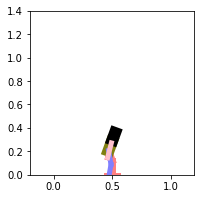

In [6]:

fig = plt.figure( figsize=(10,10) )
ax = fig.add_subplot(1,3,1)
ax.set_xlim((-0.2, 1.2))
ax.set_ylim((0, 1.4))
ax.set_aspect("equal")

robotQ = [ 90.0/180.0 * math.pi, 80.0/180.0 * math.pi, 
          20.0/180.0 * math.pi, 20.0/180.0 * math.pi, 
          -40.0/180.0 * math.pi, -30.0/180.0 * math.pi]
frame = drawRobot( ax, LEFT_LEG_SUPPORT, robotQ, [0.5,0], robotLinks )

In [7]:

class CPG:
  def __init__(self, omega, amplitude, phase = 0 ):
    self.omega = omega
    self.amplitude = amplitude
    self.phase = phase

  def control(self, t):
    return  self.amplitude * math.sin( self.phase + self.omega * t  )

  def __mul__( self, factor ):
    n = CPG( self.omega, self.amplitude * factor, self.phase )
    return n

  def __add__( self, ad ):
    n = CPG( self.omega, self.amplitude, self.phase + ad )
    return n


In [8]:
import timeit

fig = plt.figure()

t = np.linspace(0, 10, 100000)
cpgs = [CPG( 1, 1, 0 ), CPG( 1, 12, 0 ), CPG( 2, 1, 0 ), CPG( 1, 1, 0.5 ) ]

ys = np.zeros( ( len(cpgs), len(t) ) )

def loop1():
  for i,c in enumerate( cpgs ):
    for j,tt in enumerate( t ):
      ys[i,j] = c.control(tt)

def make_fv( c ):
    def fs( t ):
      return c.control(t)
    fv = np.vectorize( fs )
    return fv

fvs = [ make_fv( c ) for c in cpgs ]

def loop2():
  for i,fv in enumerate( fvs ):
    ys[i,:] = fv( t )

t1 = timeit.timeit( loop1, number=50)
print( "time loop1:", t1 )
#loop1()

t2 = timeit.timeit( loop2, number = 50 )
print( "time loop2:", t2 )

print( f"Speedup {t1/t2:.2f}" )

time loop1: 24.462360044000008
time loop2: 11.305579119000015
Speedup 2.16


<Figure size 432x288 with 0 Axes>

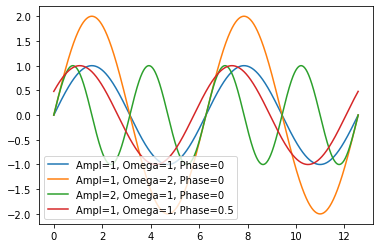

In [9]:

t = np.linspace(0, 4*math.pi, 100000)
params = [
  [ 1, 1, 0 ],
  [ 1, 2, 0 ],
  [ 2, 1, 0 ],
  [ 1, 1, 0.5 ]
]

cpgs = [ CPG(a, o, p ) for a, o, p  in params  ]

ys = np.zeros( ( len(cpgs), len(t) ) )

def make_fv( c ):
    def fs( t ):
      return c.control(t)
    fv = np.vectorize( fs )
    return fv

fvs = [ make_fv( c ) for c in cpgs ]

for i,fv in enumerate( fvs ):
  ys[i,:] = fv( t )

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for i, param in enumerate( params ):
  a, o, p = param
  ax.plot(t, ys[i], label= f"Ampl={a}, Omega={o}, Phase={p}" )

ax.legend()



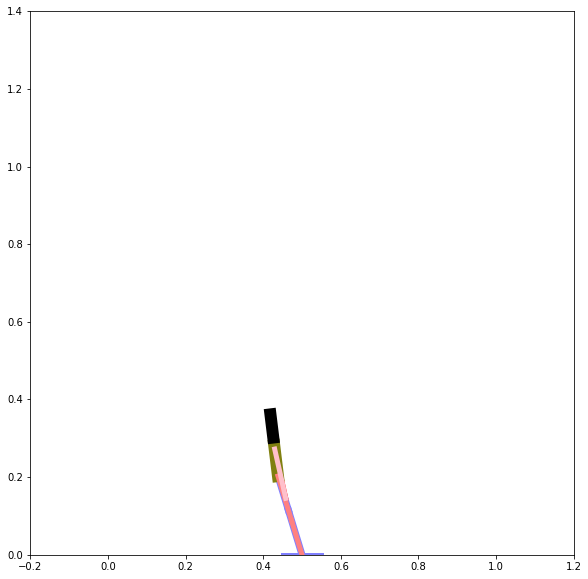

In [10]:
from matplotlib.animation import ArtistAnimation

fig = plt.figure( figsize=(10,10) )
ax = fig.add_subplot(1,1,1)
ax.set_xlim((-0.2, 1.2))
ax.set_ylim((0, 1.4))
ax.set_aspect("equal")

amplitude = 40.0/180.0*math.pi
phase = 90.0/180.0*math.pi 
omega = 1.0
state = RIGHT_LEG_SUPPORT

cpg1 = CPG( omega, amplitude, phase )

time = np.linspace( 0, 24, 50 )

frames = []

for t in time:
  state = int( t // (2 * math.pi ) % 2 )

  if ( state == RIGHT_LEG_SUPPORT ):
    robotQ = [ 90.0/180.0*math.pi, 90.0/180.0 * math.pi + cpg1.control(t), 
              0.0/180.0 * math.pi, 0.0/180.0 * math.pi, 
              -10.0/180.0 * math.pi, -10.0/180.0 * math.pi ]
  else:
    robotQ = [ 90.0/180.0*math.pi + cpg1.control(t), 90.0/180.0 * math.pi, 
              0.0/180.0 * math.pi, 0.0/180.0 * math.pi, 
              -10.0/180.0 * math.pi, -10.0/180.0 * math.pi ]
  frame,_ = drawRobot( ax, state, robotQ, [0.5,0], robotLinks )
  frames.append( frame )

#print(frames)

ani = ArtistAnimation(fig, frames, interval=150, blit=True, repeat_delay=1000)

from jblecture import addJBAnimation
a1 = addJBAnimation( "aniWalk", 0, 0, ani )

#plt.close()

[[<matplotlib.lines.Line2D object at 0x7f0ddf498850>, <matplotlib.lines.Line2D object at 0x7f0ddf496dd0>, <matplotlib.lines.Line2D object at 0x7f0ddf4ed390>, <matplotlib.lines.Line2D object at 0x7f0ddf4ed8d0>, <matplotlib.lines.Line2D object at 0x7f0ddf4eddd0>, <matplotlib.lines.Line2D object at 0x7f0ddf4e2350>, <matplotlib.lines.Line2D object at 0x7f0ddf4e2810>, <matplotlib.lines.Line2D object at 0x7f0ddf4e2d50>, <matplotlib.lines.Line2D object at 0x7f0ddf4e9250>, <matplotlib.lines.Line2D object at 0x7f0ddef7b190>, <matplotlib.lines.Line2D object at 0x7f0ddf4e9c90>, <matplotlib.lines.Line2D object at 0x7f0dde6ec1d0>, <matplotlib.lines.Line2D object at 0x7f0dde6ec6d0>, <matplotlib.lines.Line2D object at 0x7f0dde6ecbd0>, <matplotlib.lines.Line2D object at 0x7f0dde6f6190>, <matplotlib.lines.Line2D object at 0x7f0dde6f6690>], [<matplotlib.lines.Line2D object at 0x7f0dde6f6b50>, <matplotlib.lines.Line2D object at 0x7f0dde6caf50>, <matplotlib.lines.Line2D object at 0x7f0dde6e1490>, <matplot

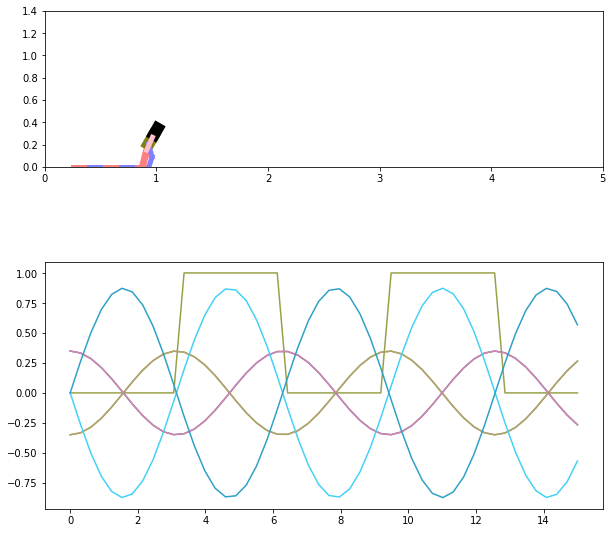

In [11]:
from matplotlib.animation import ArtistAnimation

fig = plt.figure( figsize=(10,10) )
ax1 = fig.add_subplot(2,1,1)
ax1.set_xlim((0, 5))
ax1.set_ylim((0, 1.4))
ax1.set_aspect("equal")

ax2 = fig.add_subplot(2,1,2)
xs = []
ys = [ [], [], [], [], [], [], [] ]

amplitude = 20.0/180.0*math.pi
phase = -90.0/180.0*math.pi
omega = 1.0
state = RIGHT_LEG_SUPPORT

# Left leg
cpg1 = CPG( omega, amplitude, phase ) # Ankle control
cpg2 = cpg1 * 1

#Right leg
cpg3 = cpg1 + math.pi # Ankle control offset by 180 deg. from cpg1
cpg4 = cpg3 * 1

#Left knee
cpgLK = CPG( cpg1.omega * 1, 50.0/180.0*math.pi, math.pi )
#cpgLK = CPG( cpg1.omega * 2, 0.0/180.0*math.pi, math.pi/2 )

#Right knee
cpgRK = CPG( cpg1.omega * 1, 50.0/180.0*math.pi )
#cpgRK = CPG( cpg1.omega * 2, 0.0/180.0*math.pi, math.pi/2 )

time = np.linspace( 0, 15, 50 )

pos = [0.3,0]

prevState = 0

cpgColors = np.random.random( (20,3) )

frames = []
for t in time:
  state = int(( t  // (1 * math.pi ) % 2 ))
  if state != prevState:
    pos[0]=pos[0]+2*(positions[2][0] - positions[0][0])

  #print(state)

  if ( state == RIGHT_LEG_SUPPORT ):
    robotQ = [ 90.0/180.0*math.pi, 90.0/180.0 * math.pi + cpg1.control(t), 
              0.0/180.0 * math.pi + cpgLK.control(t), 0.0/180.0 * math.pi, 
              -30.0/180.0 * math.pi + cpg2.control(t), -30.0/180.0 * math.pi - cpg1.control(t) ]
  else:
    robotQ = [ 90.0/180.0*math.pi + cpg3.control(t), 90.0/180.0 * math.pi, 
              0.0/180.0 * math.pi, 0.0/180.0 * math.pi + cpgRK.control(t), 
              -30.0/180.0 * math.pi - cpg3.control(t), -30.0/180.0 * math.pi + cpg4.control(t) ]
  frame, positions = drawRobot( ax1, state, robotQ, pos, robotLinks )

  xs.append( t )
  newItem = [ state, cpg1.control(t), cpg2.control(t), cpg3.control(t), cpg4.control(t), cpgLK.control(t), cpgRK.control(t) ]
  for i in range(len(newItem)):
    ys[i].append( newItem[i] )

  lartists=[]
  for i in range(len(newItem)):
    lartists.append( ax2.plot( xs, ys[i], '-', color=cpgColors[i], label=f"cpg{i+1}" )[0] )
  #print(lartists)
  #ax2.legend()

  frames.append( frame + lartists )
  prevState = state

print(frames)

ani = ArtistAnimation(fig, frames, interval=100, blit=True, repeat_delay=1000)

from IPython.display import HTML
display( HTML(ani.to_html5_video()) )

#plt.close()

In [12]:

def calcCenterOfMass( support, rPos, q, links, masses ):
  theta = 0.0/180.0
  prev = np.eye(4).dot( jbg.translate( rPos[0], rPos[1], 0) )

  T = []
  pos = []
  coms = []
  cpos = []

  xp,yp,_,_ = prev.dot( ORIGIN )
  pos.append([xp,yp])

  cpos.append( [xp, yp] )
  coms.append( masses[ LEFT_ANKLE+support ] )

  #artists.append( ax.plot( [0,0], [1,1], 'g-')[0] )

  for i in range( LEFT_ANKLE+support, LEFT_ANKLE+4+support, 2 ):
    angle = q[i]
    xp,yp,_,_ = prev.dot( ORIGIN )

    A = prev.dot( jbg.rotateZ( angle ) ).dot( jbg.translate( links[i+2], 0, 0 ) )
    T.append(A)
    xn,yn,_,_ = A.dot( ORIGIN )
    pos.append([xn,yn])

    xm,ym = (xp+xn)/2, (yp+yn)/2
    cpos.append( [xm, ym ] )
    coms.append( masses[i+2])

    #print( f"[{xp},{yp}]->[{xn},{yn}]")
    prev = A   


  # torso
  hip = A
  xt, yt, _, _ = hip.dot( ORIGIN )
  angle = q[LEFT_THIGH + support ]
  AHead = hip.dot( jbg.rotateZ( angle) ).dot( jbg.translate( links[TORSO], 0, 0 ) )
  prev = AHead.dot( jbg.translate( -links[TORSO], 0, 0 ) )

  xh,yh,_,_ = AHead.dot( ORIGIN )
  pos.append([xh,yh])

  cpos.append( [ (xt+xh)/2, (yt+yh)/2 ] )
  coms.append( masses[TORSO])

  xta, yta, _, _ = AHead.dot( np.array( [ 1, 0, 0, 1 ] )  )
  torsoAngle = math.atan2( yta - yh, xta - xh )
  
  angle = torsoAngle
  #print("torsoAngle", torsoAngle/math.pi*180.0)
  # Draw the swing leg
  swing = 1 - support
  for i in range( LEFT_ANKLE+4+swing, LEFT_ANKLE+swing, -2 ):
    angle = angle - q[i]

    xp,yp,_,_ = prev.dot( ORIGIN )

    A = prev.dot( jbg.rotateZ( -q[i] ) ).dot( jbg.translate( -links[i-2], 0, 0 ) )
    T.append(A)
    xn,yn,_,_ = A.dot( ORIGIN )
    pos.append([xn,yn])
    cpos.append( [ (xp+xn)/2, (yp+yn)/2] )
    coms.append( masses[i-2] )
    prev = A

  cpos.append( [ xn, yn ] )
  coms.append( masses[LEFT_ANKLE + 1-support] )

  sumXM, sumYM, sumM = 0, 0, 0

  for i in range(len(coms) ):
    xm, ym = cpos[i]
    sumXM = sumXM + xm * coms[i] 
    sumYM = sumYM + ym * coms[i]
    sumM = sumM + coms[i]
  
  com = [ sumXM/sumM, sumYM/sumM, False ]
  if com[0] >= rPos[0] - links[0+support]/2 and com[0] <= rPos[0] + links[0+support]/2:
    com[2] = True
  return com, cpos

In [13]:
def drawCenterOfMassInfo( ax, coms ):
  com, linkCoMs = coms
  artists = []
  for p in linkCoMs:
    px, py = p
    artists.append( ax.scatter( [px], [py], 50, color = "blue" ) )
  artists.append( ax.scatter( [ com[0] ], [ com[1] ], 30, color="green" ) )

  if com[2]:
    artists.append( ax.plot([ com[0], com[0] ], [com[1], 0 ], 'g--' )[0] )
  else:
    artists.append( ax.plot([ com[0], com[0] ], [com[1], 0 ], 'r--', linewidth=2 )[0] )
  return artists


[[<matplotlib.lines.Line2D object at 0x7f0ddd2059d0>, <matplotlib.lines.Line2D object at 0x7f0ddd212f50>, <matplotlib.lines.Line2D object at 0x7f0ddd219510>, <matplotlib.lines.Line2D object at 0x7f0ddd219a50>, <matplotlib.lines.Line2D object at 0x7f0ddd219f50>, <matplotlib.lines.Line2D object at 0x7f0ddd2214d0>, <matplotlib.lines.Line2D object at 0x7f0ddd221990>, <matplotlib.lines.Line2D object at 0x7f0ddd221ed0>, <matplotlib.lines.Line2D object at 0x7f0ddd22a3d0>, <matplotlib.collections.PathCollection object at 0x7f0ddd27d590>, <matplotlib.collections.PathCollection object at 0x7f0ddd22ac90>, <matplotlib.collections.PathCollection object at 0x7f0ddd22a890>, <matplotlib.collections.PathCollection object at 0x7f0ddd23a4d0>, <matplotlib.collections.PathCollection object at 0x7f0ddd23a8d0>, <matplotlib.collections.PathCollection object at 0x7f0ddd23ab10>, <matplotlib.collections.PathCollection object at 0x7f0ddd23af50>, <matplotlib.collections.PathCollection object at 0x7f0ddd23aa90>, <m

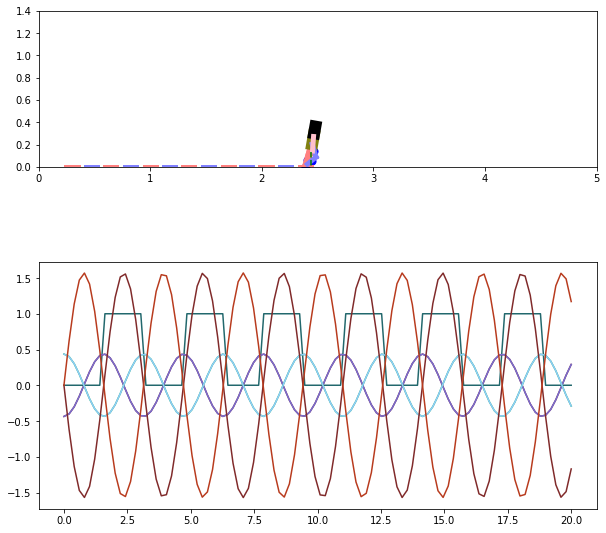

In [14]:
from matplotlib.animation import ArtistAnimation

fig = plt.figure( figsize=(10,10) )
ax1 = fig.add_subplot(2,1,1)
ax1.set_xlim((0, 5))
ax1.set_ylim((0, 1.4))
ax1.set_aspect("equal")

ax2 = fig.add_subplot(2,1,2)
xs = []
ys = [ [], [], [], [], [], [], [] ]

amplitude = 25.0/180.0*math.pi
phase = -90.0/180.0*math.pi
omega = 2.0
state = RIGHT_LEG_SUPPORT

# Left leg
cpg1 = CPG( omega, amplitude, phase )
cpg2 = cpg1

#Right leg
cpg3 = cpg1 + math.pi
#cpg3 = CPG( omega, amplitude/2, phase + math.pi ) 
cpg4 = cpg3

#Left knee
cpgLK = CPG( cpg1.omega, 90.0/180.0*math.pi, math.pi )

#Right knee
cpgRK = CPG( cpg1.omega, 90.0/180.0*math.pi )

time = np.linspace( 0, 20, 100 )

pos = [0.3,0]

prevState = 0

cpgColors = np.random.random( (20,3) )

frames = []
for t in time:
  state = int( ( t  * omega ) // (1 * math.pi ) ) % 2 
  if state != prevState:
    pos[0]=pos[0]+2*(positions[2][0] - positions[0][0])

  #print(state)

  if ( state == RIGHT_LEG_SUPPORT ):
    robotQ = [ 90.0/180.0*math.pi, 90.0/180.0 * math.pi + cpg1.control(t), 
              0.0/180.0 * math.pi + cpgLK.control(t), 0.0/180.0 * math.pi, 
              -10.0/180.0 * math.pi + cpg2.control(t), -10.0/180.0 * math.pi - cpg1.control(t) ]
  else:
    robotQ = [ 90.0/180.0*math.pi + cpg3.control(t), 90.0/180.0 * math.pi, 
              0.0/180.0 * math.pi, 0.0/180.0 * math.pi + + cpgRK.control(t), 
              -10.0/180.0 * math.pi - cpg3.control(t), -10.0/180.0 * math.pi + cpg4.control(t) ]
  frame, positions = drawRobot( ax1, state, robotQ, pos, robotLinks )

  com = calcCenterOfMass( state, pos, robotQ, robotLinks, robotMasses )
  comArtists = drawCenterOfMassInfo( ax1, com )

  xs.append( t )
  newItem = [ state, cpg1.control(t), cpg2.control(t), cpg3.control(t), cpg4.control(t), cpgLK.control(t), cpgRK.control(t) ]
  for i in range(len(newItem)):
    ys[i].append( newItem[i] )

  lartists=[]
  for i in range(len(newItem)):
    lartists.append( ax2.plot( xs, ys[i], '-', color=cpgColors[i], label=f"cpg{i+1}" )[0] )
  #print(lartists)
  #ax2.legend()

  frames.append( frame + comArtists + lartists )
  prevState = state

print(frames)

ani = ArtistAnimation(fig, frames, interval=100, blit=True, repeat_delay=1000)

ani2 = addJBAnimation("ani", 0, 0, ani )

from IPython.display import HTML
display( HTML(ani.to_html5_video()) )

#plt.close()



walk 3m to forward and 3m backwards


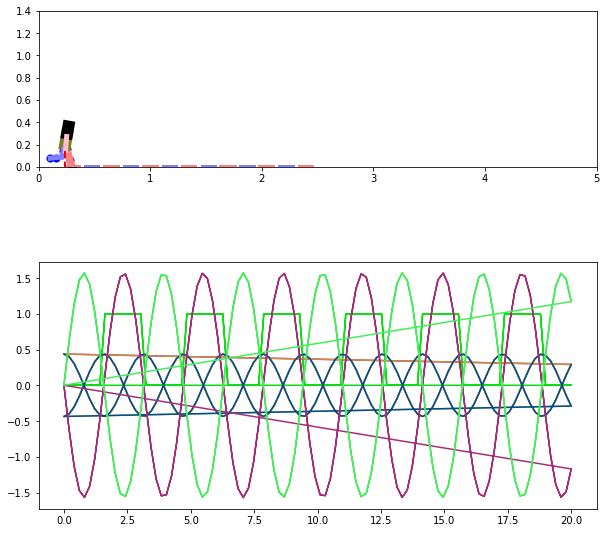

In [15]:
from matplotlib.animation import ArtistAnimation

fig = plt.figure( figsize=(10,10) )
ax1 = fig.add_subplot(2,1,1)
ax1.set_xlim((0, 5))
ax1.set_ylim((0, 1.4))
ax1.set_aspect("equal")

ax2 = fig.add_subplot(2,1,2)
xs = []
ys = [ [], [], [], [], [], [], [] ]



#vai p frente
amplitude = 25.0/180.0*math.pi
phase = -90.0/180.0*math.pi
omega = 2.0
state = RIGHT_LEG_SUPPORT

# Left leg
cpg1 = CPG( omega, amplitude, phase )
cpg2 = cpg1

#Right leg
cpg3 = cpg1 + math.pi
#cpg3 = CPG( omega, amplitude/2, phase + math.pi ) 
cpg4 = cpg3

#Left knee
cpgLK = CPG( cpg1.omega, 90.0/180.0*math.pi, math.pi )

#Right knee
cpgRK = CPG( cpg1.omega, 90.0/180.0*math.pi )

time = np.linspace( 0, 20, 100 )

pos = [0.3,0]

prevState = 0

cpgColors = np.random.random( (20,3) )

frames = []
for t in time:
  state = int( ( t  * omega ) // (1 * math.pi ) ) % 2 
  if state != prevState:
    pos[0]=pos[0]+2*(positions[2][0] - positions[0][0])

  #print(state)

  if ( state == RIGHT_LEG_SUPPORT ):
    robotQ = [ 90.0/180.0*math.pi, 90.0/180.0 * math.pi + cpg1.control(t), 
              0.0/180.0 * math.pi + cpgLK.control(t), 0.0/180.0 * math.pi, 
              -10.0/180.0 * math.pi + cpg2.control(t), -10.0/180.0 * math.pi - cpg1.control(t) ]
  else:
    robotQ = [ 90.0/180.0*math.pi + cpg3.control(t), 90.0/180.0 * math.pi, 
              0.0/180.0 * math.pi, 0.0/180.0 * math.pi + + cpgRK.control(t), 
              -10.0/180.0 * math.pi - cpg3.control(t), -10.0/180.0 * math.pi + cpg4.control(t) ]
  frame, positions = drawRobot( ax1, state, robotQ, pos, robotLinks )

  com = calcCenterOfMass( state, pos, robotQ, robotLinks, robotMasses )
  comArtists = drawCenterOfMassInfo( ax1, com )

  xs.append( t )
  newItem = [ state, cpg1.control(t), cpg2.control(t), cpg3.control(t), cpg4.control(t), cpgLK.control(t), cpgRK.control(t) ]
  for i in range(len(newItem)):
    ys[i].append( newItem[i] )

  lartists=[]
  for i in range(len(newItem)):
    lartists.append( ax2.plot( xs, ys[i], '-', color=cpgColors[i], label=f"cpg{i+1}" )[0] )
  #print(lartists)
  #ax2.legend()

  frames.append( frame + comArtists + lartists )
  prevState = state

#vai p tras

amplitude = -25.0/180.0*math.pi
phase = -90.0/180.0*math.pi
omega = 2.0

# Left leg
cpg1 = CPG( omega, amplitude, phase )
cpg2 = cpg1

#Right leg
cpg3 = cpg1 + math.pi
#cpg3 = CPG( omega, amplitude/2, phase + math.pi ) 
cpg4 = cpg3

#Left knee
cpgLK = CPG( cpg1.omega, 90.0/180.0*math.pi, math.pi )

#Right knee
cpgRK = CPG( cpg1.omega, 90.0/180.0*math.pi )

time = np.linspace( 0, 20, 100 )

#pos = [0.3,0]

prevState = state


for t in time:
  state = int( ( t  * omega ) // (1 * math.pi ) ) % 2 
  if state != prevState:
    pos[0]=pos[0]+2*(positions[2][0] - positions[0][0])

  #print(state)

  if ( state == RIGHT_LEG_SUPPORT ):
    robotQ = [ 90.0/180.0*math.pi, 90.0/180.0 * math.pi + cpg1.control(t), 
              0.0/180.0 * math.pi + cpgLK.control(t), 0.0/180.0 * math.pi, 
              -10.0/180.0 * math.pi + cpg2.control(t), -10.0/180.0 * math.pi - cpg1.control(t) ]
  else:
    robotQ = [ 90.0/180.0*math.pi + cpg3.control(t), 90.0/180.0 * math.pi, 
              0.0/180.0 * math.pi, 0.0/180.0 * math.pi + + cpgRK.control(t), 
              -10.0/180.0 * math.pi - cpg3.control(t), -10.0/180.0 * math.pi + cpg4.control(t) ]
  frame, positions = drawRobot( ax1, state, robotQ, pos, robotLinks )

  com = calcCenterOfMass( state, pos, robotQ, robotLinks, robotMasses )
  comArtists = drawCenterOfMassInfo( ax1, com )

  xs.append( t )
  newItem = [ state, cpg1.control(t), cpg2.control(t), cpg3.control(t), cpg4.control(t), cpgLK.control(t), cpgRK.control(t) ]
  for i in range(len(newItem)):
    ys[i].append( newItem[i] )

  lartists=[]
  for i in range(len(newItem)):
    lartists.append( ax2.plot( xs, ys[i], '-', color=cpgColors[i], label=f"cpg{i+1}" )[0] )
  #print(lartists)
  #ax2.legend()

  frames.append( frame + comArtists + lartists )
  prevState = state



ani = ArtistAnimation(fig, frames, interval=100, blit=True, repeat_delay=1000)

ani2 = addJBAnimation("ani", 0, 0, ani )

from IPython.display import HTML
display( HTML(ani.to_html5_video()) )

#plt.close()



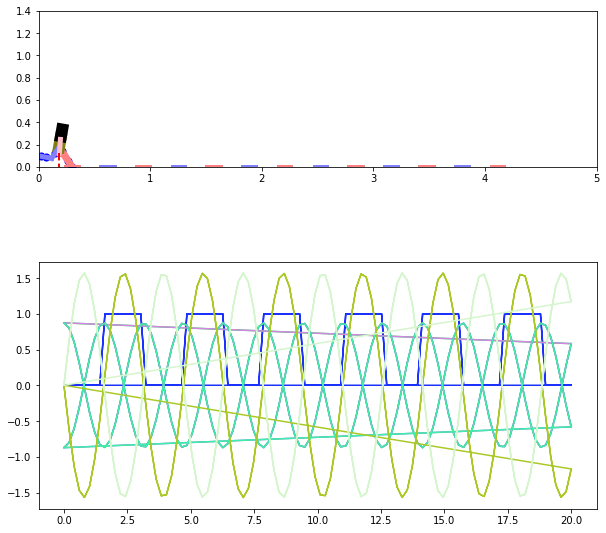

In [17]:
from matplotlib.animation import ArtistAnimation

fig = plt.figure( figsize=(10,10) )
ax1 = fig.add_subplot(2,1,1)
ax1.set_xlim((0, 5))
ax1.set_ylim((0, 1.4))
ax1.set_aspect("equal")

ax2 = fig.add_subplot(2,1,2)
xs = []
ys = [ [], [], [], [], [], [], [] ]



#vai p frente
amplitude = 50.0/180.0*math.pi
phase = -90.0/180.0*math.pi
omega = 2.0
state = RIGHT_LEG_SUPPORT

# Left leg
cpg1 = CPG( omega, amplitude, phase )
cpg2 = cpg1

#Right leg
cpg3 = cpg1 + math.pi
#cpg3 = CPG( omega, amplitude/2, phase + math.pi ) 
cpg4 = cpg3

#Left knee
cpgLK = CPG( cpg1.omega, 90.0/180.0*math.pi, math.pi )

#Right knee
cpgRK = CPG( cpg1.omega, 90.0/180.0*math.pi )

time = np.linspace( 0, 20, 100 )

pos = [0.3,0]

prevState = 0

cpgColors = np.random.random( (20,3) )

frames = []
for t in time:
  state = int( ( t  * omega ) // (1 * math.pi ) ) % 2 
  if state != prevState:
    pos[0]=pos[0]+2*(positions[2][0] - positions[0][0])

  #print(state)

  if ( state == RIGHT_LEG_SUPPORT ):
    robotQ = [ 90.0/180.0*math.pi, 90.0/180.0 * math.pi + cpg1.control(t), 
              0.0/180.0 * math.pi + cpgLK.control(t), 0.0/180.0 * math.pi, 
              -10.0/180.0 * math.pi + cpg2.control(t), -10.0/180.0 * math.pi - cpg1.control(t) ]
  else:
    robotQ = [ 90.0/180.0*math.pi + cpg3.control(t), 90.0/180.0 * math.pi, 
              0.0/180.0 * math.pi, 0.0/180.0 * math.pi + + cpgRK.control(t), 
              -10.0/180.0 * math.pi - cpg3.control(t), -10.0/180.0 * math.pi + cpg4.control(t) ]
  frame, positions = drawRobot( ax1, state, robotQ, pos, robotLinks )

  com = calcCenterOfMass( state, pos, robotQ, robotLinks, robotMasses )
  comArtists = drawCenterOfMassInfo( ax1, com )

  xs.append( t )
  newItem = [ state, cpg1.control(t), cpg2.control(t), cpg3.control(t), cpg4.control(t), cpgLK.control(t), cpgRK.control(t) ]
  for i in range(len(newItem)):
    ys[i].append( newItem[i] )

  lartists=[]
  for i in range(len(newItem)):
    lartists.append( ax2.plot( xs, ys[i], '-', color=cpgColors[i], label=f"cpg{i+1}" )[0] )
  #print(lartists)
  #ax2.legend()

  frames.append( frame + comArtists + lartists )
  prevState = state

#vai p tras

amplitude = -50.0/180.0*math.pi
phase = -90.0/180.0*math.pi
omega = 2.0

# Left leg
cpg1 = CPG( omega, amplitude, phase )
cpg2 = cpg1

#Right leg
cpg3 = cpg1 + math.pi
#cpg3 = CPG( omega, amplitude/2, phase + math.pi ) 
cpg4 = cpg3

#Left knee
cpgLK = CPG( cpg1.omega, 90.0/180.0*math.pi, math.pi )

#Right knee
cpgRK = CPG( cpg1.omega, 90.0/180.0*math.pi )

time = np.linspace( 0, 20, 100 )

#pos = [0.3,0]

prevState = state


for t in time:
  state = int( ( t  * omega ) // (1 * math.pi ) ) % 2 
  if state != prevState:
    pos[0]=pos[0]+2*(positions[2][0] - positions[0][0])

  #print(state)

  if ( state == RIGHT_LEG_SUPPORT ):
    robotQ = [ 90.0/180.0*math.pi, 90.0/180.0 * math.pi + cpg1.control(t), 
              0.0/180.0 * math.pi + cpgLK.control(t), 0.0/180.0 * math.pi, 
              -10.0/180.0 * math.pi + cpg2.control(t), -10.0/180.0 * math.pi - cpg1.control(t) ]
  else:
    robotQ = [ 90.0/180.0*math.pi + cpg3.control(t), 90.0/180.0 * math.pi, 
              0.0/180.0 * math.pi, 0.0/180.0 * math.pi + + cpgRK.control(t), 
              -10.0/180.0 * math.pi - cpg3.control(t), -10.0/180.0 * math.pi + cpg4.control(t) ]
  frame, positions = drawRobot( ax1, state, robotQ, pos, robotLinks )

  com = calcCenterOfMass( state, pos, robotQ, robotLinks, robotMasses )
  comArtists = drawCenterOfMassInfo( ax1, com )

  xs.append( t )
  newItem = [ state, cpg1.control(t), cpg2.control(t), cpg3.control(t), cpg4.control(t), cpgLK.control(t), cpgRK.control(t) ]
  for i in range(len(newItem)):
    ys[i].append( newItem[i] )

  lartists=[]
  for i in range(len(newItem)):
    lartists.append( ax2.plot( xs, ys[i], '-', color=cpgColors[i], label=f"cpg{i+1}" )[0] )
  #print(lartists)
  #ax2.legend()

  frames.append( frame + comArtists + lartists )
  prevState = state



ani = ArtistAnimation(fig, frames, interval=100, blit=True, repeat_delay=1000)

ani2 = addJBAnimation("ani", 0, 0, ani )

from IPython.display import HTML
display( HTML(ani.to_html5_video()) )

#plt.close()

